In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock = '^RUT'
data = yf.download(stock,'2010-01-01','2023-05-14')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,628.109985,640.099976,628.109985,640.099976,640.099976,3991400000
2010-01-05,639.690002,641.890015,635.950012,638.489990,638.489990,2491020000
2010-01-06,638.289978,641.260010,636.400024,637.950012,637.950012,4972660000
2010-01-07,638.109985,642.070007,632.739990,641.969971,641.969971,5270680000
2010-01-08,640.340027,644.690002,639.559998,644.559998,644.559998,4389590000


In [3]:
price = data['Close']
price

Date
2010-01-04     640.099976
2010-01-05     638.489990
2010-01-06     637.950012
2010-01-07     641.969971
2010-01-08     644.559998
                 ...     
2023-05-08    1754.469971
2023-05-09    1749.680054
2023-05-10    1759.510010
2023-05-11    1744.709961
2023-05-12    1740.849976
Name: Close, Length: 3363, dtype: float64

<Axes: xlabel='Date'>

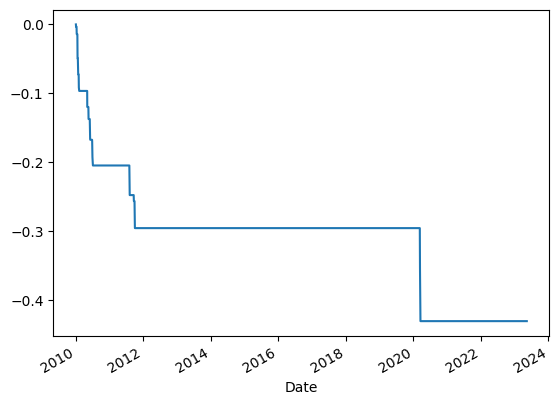

In [5]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()


In [6]:
print(f"Maximum Drawdown is: {mdd[-1]*100} %")

Maximum Drawdown is: -43.061325684645624 %


In [7]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        , -0.00251521, -0.00084571, ...,  0.00561814,
       -0.00841146, -0.00221239])

In [8]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 0.99748479, 0.99664121, ..., 2.74880499, 2.72568353,
       2.71965324])

In [9]:
print(f"Cumulative return is {cumulative_ret[-1]*100}%")

Cumulative return is 271.9653244780073%


In [10]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.054527
2012-12-31    0.146345
2013-12-31    0.370036
2014-12-31    0.035286
2015-12-31   -0.057118
2016-12-31    0.194772
2017-12-31    0.131439
2018-12-31   -0.121751
2019-12-31    0.237223
2020-12-31    0.183635
2021-12-31    0.136946
2022-12-31   -0.215587
2023-12-31   -0.011583
Freq: A-DEC, Name: Close, dtype: float64

In [11]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28    0.044050
2010-03-31    0.079674
2010-04-30    0.055935
2010-05-31   -0.076737
                ...   
2023-01-31    0.096914
2023-02-28   -0.018091
2023-03-31   -0.049821
2023-04-30   -0.018580
2023-05-31   -0.015907
Freq: M, Name: Close, Length: 161, dtype: float64

In [16]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is {avg_yearly_return*100}%")

Average yearly return is 7.500905122830439%


In [17]:
sharpe_ratio = (avg_yearly_return - 0.07)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 0.8922124866380131


In [18]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-05-31   -0.076737
2010-06-30   -0.078778
2010-08-31   -0.075020
2011-01-31   -0.003063
2011-05-31   -0.019635
                ...   
2022-12-31   -0.066432
2023-02-28   -0.018091
2023-03-31   -0.049821
2023-04-30   -0.018580
2023-05-31   -0.015907
Name: Close, Length: 62, dtype: float64

In [19]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.07)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 1.2589239348539154
